In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import normaltest, ttest_ind
import seaborn as sns
import statsmodels.api as sm

/Users/12345/anaconda/envs/py3k/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# Read data and print
df = pd.read_csv("dried_plant_weights.csv")
df

,Control,Treatment
0,4.17,4.81
1,4.66,5.36
2,3.05,4.17
3,5.58,3.48
4,5.18,4.41
5,3.66,4.69
6,4.01,3.59
7,4.50,4.44
8,6.11,5.87
9,3.90,4.89


In [3]:
# General description of the data
df.describe()

,Control,Treatment
count,20.000000,20.000000
mean,4.726500,4.860000
std,0.863526,0.790922
min,3.050000,3.480000
25%,4.077500,4.387500
50%,4.635000,4.850000
75%,5.392500,5.390000
max,6.110000,6.340000


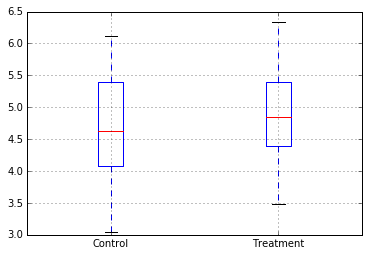

In [4]:
# Check data distribution using boxplot
df.boxplot()

In [5]:
# Check data for normality -- Notice, the samples are not significantly different from a normal distribution
print(normaltest(df.Control))
print(normaltest(df.Treatment))

NormaltestResult(statistic=1.0206171508710873, pvalue=0.60031030921378559)
NormaltestResult(statistic=0.21218312969990935, pvalue=0.89934229616330519)


In [6]:
# Perform T-test assuming equal variance -- Notice, the samples are not significantly different from each other
print("\nStandard independent 2 sample test.")
print(ttest_ind(df.Control,df.Treatment))


Standard independent 2 sample test.
Ttest_indResult(statistic=-0.50984762660717009, pvalue=0.61310682332280919)


In [7]:
# Perform T-test assuming unequal variance -- Notice, the samples are not significantly different from each other
print("\nWelch's t-test: assumes unequal variance.")
print(ttest_ind(df.Control,df.Treatment, equal_var = False))


Welch's t-test: assumes unequal variance.
Ttest_indResult(statistic=-0.50984762660717009, pvalue=0.61312935169004179)


### Effects of design matrix

In [8]:
# Get data in slightly different format with design matrix
linear_df = pd.read_csv("dried_plant_weights_linear_model.csv")
linear_df

,Samples,y,Control,Treatment
0,Control,4.17,1.0,0.0
1,Control,4.66,1.0,0.0
2,Control,3.05,1.0,0.0
3,Control,5.58,1.0,0.0
4,Control,5.18,1.0,0.0
5,Control,3.66,1.0,0.0
6,Control,4.01,1.0,0.0
7,Control,4.50,1.0,0.0
8,Control,6.11,1.0,0.0
9,Control,3.90,1.0,0.0


In [9]:
# Extract design matrix
design = linear_df[["Control","Treatment"]]
design

,Control,Treatment
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
5,1.0,0.0
6,1.0,0.0
7,1.0,0.0
8,1.0,0.0
9,1.0,0.0


In [10]:
# Model using ordinary least squares and print results -- Notice specifically how the design matrix is formatted
model = sm.OLS(linear_df.y, design)
results = model.fit()

print("\n\nMultiple linear regression results:\n")
print("Design matrix: E(Y_(1k)) = _beta1 and E(Y_(2k)) = _beta2 -- E() is expected value (here, the mean)")

print("\nParameters: Here, each coefficient is the corresponding group mean -- See data description above")
print(results.params)
print("General results:")
print(results.summary())



Multiple linear regression results:

Design matrix: E(Y_(1k)) = _beta1 and E(Y_(2k)) = _beta2 -- E() is expected value (here, the mean)

Parameters: Here, each coefficient is the corresponding group mean -- See data description above
Control      4.7265
Treatment    4.8600
dtype: float64
General results:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                 -0.019
Method:                 Least Squares   F-statistic:                    0.2599
Date:                Tue, 15 Aug 2017   Prob (F-statistic):              0.613
Time:                        12:10:04   Log-Likelihood:                -48.183
No. Observations:                  40   AIC:                             100.4
Df Residuals:                      38   BIC:                             103.7
Df Model:                           1                       

In [11]:
# Change the design matrix
design["Control"]=[1 for i in range(40)]
design.columns = ["Control_Average", "Treatment_Offset"]
design

/Users/12345/anaconda/envs/py3k/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,Control_Average,Treatment_Offset
0,1,0.0
1,1,0.0
2,1,0.0
3,1,0.0
4,1,0.0
5,1,0.0
6,1,0.0
7,1,0.0
8,1,0.0
9,1,0.0


In [12]:
# Model using OLS as before
model = sm.OLS(linear_df.y, design)
results = model.fit()

print("\n\nMultiple linear regression results:\n")
print("Design matrix: E(Y_(1k)) = _beta0 or _mu and E(Y_(2k)) = _beta1 or _alpha")
print("\twhere alpha is the Treatment's deviation from the Control mean")
print("\tThis is corner point parameterization")

print("\nParameters: Here, the coefficients are slightly different " + 
      "with the first being the Control mean and the second being the Treatment offset.")
print(results.params)
print("Control mean = {0:.4f} (_beta1)".format(results.params["Control_Average"]))
print("Treatment mean = {0:.4f} + {1:.4f} = {2:.4f}".format(
    results.params["Control_Average"],
    results.params["Treatment_Offset"],
    results.params["Control_Average"]+results.params["Treatment_Offset"]))
print("General results:")
print(results.summary())



Multiple linear regression results:

Design matrix: E(Y_(1k)) = _beta0 or _mu and E(Y_(2k)) = _beta1 or _alpha
	where alpha is the Treatment's deviation from the Control mean
	This is corner point parameterization

Parameters: Here, the coefficients are slightly different with the first being the Control mean and the second being the Treatment offset.
Control_Average     4.7265
Treatment_Offset    0.1335
dtype: float64
Control mean = 4.7265 (_beta1)
Treatment mean = 4.7265 + 0.1335 = 4.8600
General results:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                 -0.019
Method:                 Least Squares   F-statistic:                    0.2599
Date:                Tue, 15 Aug 2017   Prob (F-statistic):              0.613
Time:                        12:10:04   Log-Likelihood:                -48.183
No. Observa

In [13]:
# Change the design matrix one more time
design["Treatment_Offset"] = [1 for i in range(20)] + [-1 for j in range(20)]
design.columns = ["Overall_Average", "Group_Offset"]
design

/Users/12345/anaconda/envs/py3k/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,Overall_Average,Group_Offset
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
5,1,1
6,1,1
7,1,1
8,1,1
9,1,1


In [14]:
# Model and print results
model = sm.OLS(linear_df.y, design)
results = model.fit()

print("\n\nMultiple linear regression results:\n")
print("Design matrix: E(Y_(1k)) = _beta0 (_mu) + _alpha and E(Y_(2k)) = _beta1 (_mu) - _alpha")
print("\twhere alpha is the group's deviation from the overall mean")
print("\tThis is a sum-to-zero constraint")

print("\nParameters: Here the first is the overall mean and " + 
"the second is the group deviation from the mean")
print("\tthe t-test null here is that _beta1 (slope) = 0")
print("\tthe t-statistic is _beta1 (slope) / Standard Error of _beta1")
print("\tthe p-value is calculated from the t-statistic")
print(results.params)
print("Control mean = {0:.4f} + {1:.4f} = {2:.4f}".format(
        results.params["Overall_Average"],
        results.params["Group_Offset"],
        results.params["Overall_Average"]+results.params["Group_Offset"]))
print("Treatment mean = {0:.4f} - {1:.4f} = {2:.4f}".format(
        results.params["Overall_Average"],
        results.params["Group_Offset"],
        results.params["Overall_Average"]-results.params["Group_Offset"]))
print("General results:")
print(results.summary())



Multiple linear regression results:

Design matrix: E(Y_(1k)) = _beta0 (_mu) + _alpha and E(Y_(2k)) = _beta1 (_mu) - _alpha
	where alpha is the group's deviation from the overall mean
	This is a sum-to-zero constraint

Parameters: Here the first is the overall mean and the second is the group deviation from the mean
	the t-test null here is that _beta1 (slope) = 0
	the t-statistic is _beta1 (slope) / Standard Error of _beta1
	the p-value is calculated from the t-statistic
Overall_Average    4.79325
Group_Offset      -0.06675
dtype: float64
Control mean = 4.7933 + -0.0667 = 4.7265
Treatment mean = 4.7933 - -0.0667 = 4.8600
General results:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                 -0.019
Method:                 Least Squares   F-statistic:                    0.2599
Date:                Tue, 15 Aug 20